<a href="https://colab.research.google.com/github/mwang-cmn/Python-notebooks/blob/main/Electricity_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
path = "/content/drive/MyDrive/Project/"
data = pd.read_excel(path + "Data.xlsx", skiprows=2)
data.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Hour                                8760 non-null   int64         
 1   Date/hour start                     8760 non-null   datetime64[ns]
 2   Solar electricity generation (kWh)  8760 non-null   float64       
 3   Electricity usage (kWh)             8760 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.9 KB


In [18]:
# Extract month
data['Month'] = data['Date/hour start'].dt.month


In [19]:
data = data.rename(columns={
    "Solar electricity generation (kWh)": "Solar_Generation",
    "Electricity usage (kWh)": "Electricity_Usage"
})

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Hour               8760 non-null   int64         
 1   Date/hour start    8760 non-null   datetime64[ns]
 2   Solar_Generation   8760 non-null   float64       
 3   Electricity_Usage  8760 non-null   float64       
 4   Month              8760 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 308.1 KB


In [21]:
data.describe()

,Hour,Date/hour start,Solar_Generation,Electricity_Usage,Month
count,8760.000000,8760,8760.000000,8760.000000,8760.000000
mean,11.500000,2020-07-02 07:37:13.972602624,1.116750,7.312704,6.526027
min,0.000000,2020-01-01 00:00:00,0.000000,-12.624000,1.000000
25%,5.750000,2020-04-02 05:45:00,0.000000,0.300000,4.000000
50%,11.500000,2020-07-02 11:30:00,0.024000,0.621000,7.000000
75%,17.250000,2020-10-01 17:15:00,1.272750,1.686000,10.000000
max,23.000000,2020-12-31 23:00:00,13.050000,46000.000000,12.000000
std,6.922582,NaN,2.026098,491.479806,3.448048


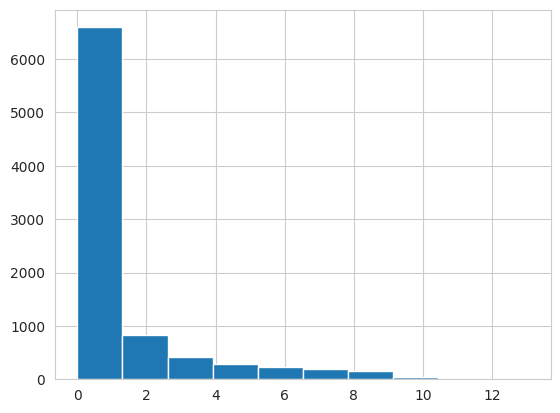

In [22]:
data['Solar_Generation'].hist()
plt.show()

1. **Calculate the hourly average electricity usage and solar generation**

In [23]:
hourly_usage = data.groupby('Hour')[["Solar_Generation", "Electricity_Usage"]].mean()
hourly_usage.head()

,Solar_Generation,Electricity_Usage
Hour,,
0,0.000000,0.816471
1,0.035753,0.401552
2,0.000000,0.250623
3,0.000000,0.407688
4,0.078559,0.552038


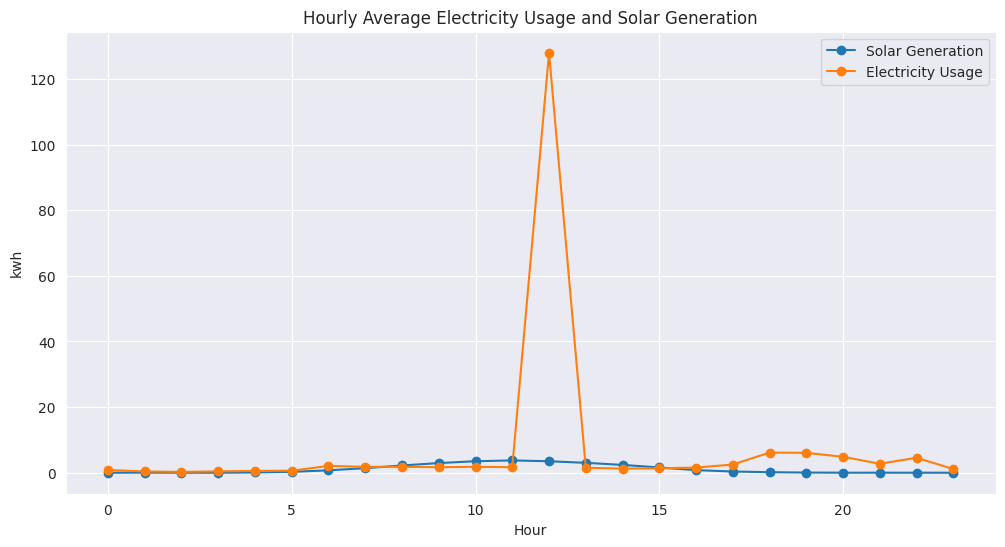

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(hourly_usage.index, hourly_usage['Solar_Generation'], label = 'Solar Generation', marker='o')
plt.plot(hourly_usage.index, hourly_usage['Electricity_Usage'], label='Electricity Usage', marker='o')
plt.xlabel('Hour')
plt.ylabel('kwh')
plt.title('Hourly Average Electricity Usage and Solar Generation')
plt.legend()
plt.grid(True)
plt.show()

The chart above indicates a sudden peak in electricity usage in hour 12, with more than 120 kwh used during that hour. There are potential outliers in the data set.

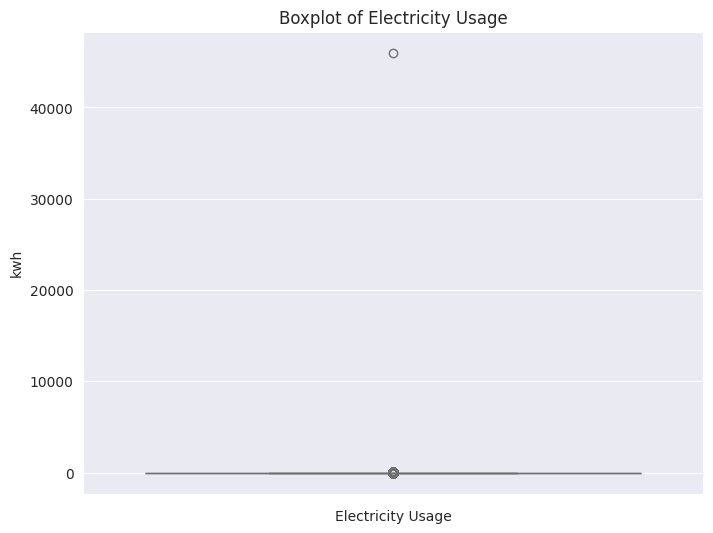

In [36]:

plt.figure(figsize=(8, 6))
sns.boxplot(y='Electricity_Usage', data=data, color='skyblue')
plt.xlabel('Electricity Usage')
plt.ylabel('kwh')
plt.title('Boxplot of Electricity Usage')
plt.show()

In [33]:
# Interquartile Range
Q1 = data["Electricity_Usage"].quantile(0.25)
Q3 = data['Electricity_Usage'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['Electricity_Usage'] < lower_bound) | (data['Electricity_Usage'] > upper_bound)]
#print outliers
outliers

,Hour,Date/hour start,Solar_Generation,Electricity_Usage,Month
17,17,2020-01-01 17:00:00,0.006,-12.6240,1
18,18,2020-01-01 18:00:00,0.000,8.9298,1
20,20,2020-01-01 20:00:00,0.003,4.4286,1
21,21,2020-01-01 21:00:00,0.003,6.7890,1
37,13,2020-01-02 13:00:00,0.504,22.5000,1
...,...,...,...,...,...
8730,18,2020-12-30 18:00:00,0.012,7.0092,12
8731,19,2020-12-30 19:00:00,0.006,3.8808,12
8754,18,2020-12-31 18:00:00,0.012,4.8972,12
8755,19,2020-12-31 19:00:00,0.012,4.3956,12
